### Kaggle Link

https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

%matplotlib inline

In [2]:
train_df = pd.read_csv('../Data/Kaggle/toxic_train.csv')
test_df  = pd.read_csv('../Data/Kaggle/toxic_test.csv')

In [3]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
test_df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [5]:
train_df.shape

(159571, 8)

In [6]:
test_df.shape

(153164, 2)

### Pre-Processing

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [8]:
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
lemma = WordNetLemmatizer()

In [9]:
from autocorrect import spell

In [10]:
def spellcheck_string(input_str):
    return [lemma.lemmatize(word) for word in input_str]

train_df.name = 'Train'
test_df.name  = 'Test'

for df in [train_df, test_df]:
    print(df.name)
    print('---> Tokenizing...')
    df['comment_text'] = df['comment_text'].apply(lambda x: word_tokenize(str(x)))
    print('---> Lemmatizing...')
    df['comment_text'] = df['comment_text'].map(spellcheck_string)
    print('---> Joining...')
    df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(x))
    print('--> Done!!!')

Train
---> Tokenizing...
---> Lemmatizing...
---> Joining...
--> Done!!!
Test
---> Tokenizing...
---> Lemmatizing...
---> Joining...
--> Done!!!


### Feature Engineering 

In [11]:
import re

for df in [train_df, test_df]:
    df['len'] = df['comment_text'].apply(lambda x: len(str(x)))
    df['num_numbers'] = df['comment_text'].apply(lambda x: len(re.sub(r'\D+', '', str(x))))
    df['num_non-word'] = df['comment_text'].apply(lambda x: len(re.sub(r'\w+', '', str(x))))    
    df['num_capitals'] = df['comment_text'].apply(lambda x: sum(1 for c in x if c.isupper()))
    df['caps_vs_len'] = df.apply(lambda row: 0 if row['len'] == 0 else float(row['num_capitals'])/float(row['len']),  axis=1)
    df['num_exclamation_marks'] = df['comment_text'].apply(lambda x: x.count('!'))
    df['num_question_marks'] = df['comment_text'].apply(lambda x: x.count('?'))
    df['num_punctuation'] = df['comment_text'].apply(lambda x: sum(x.count(w) for w in '.,;:'))
    df['num_symbols'] = df['comment_text'].apply(lambda x: sum(x.count(w) for w in '*&$%#'))
    df['num_words'] = df['comment_text'].apply(lambda x: len(x.split()))
    df['num_unique_words'] = df['comment_text'].apply(lambda x: len(set(w for w in x.split())))
    df['words_vs_unique'] = df['num_unique_words'] / df['num_words']

In [12]:
new_features = ['len', 'num_numbers', 'num_non-word', 'num_capitals', 'caps_vs_len', 
                'num_exclamation_marks', 'num_question_marks', 'num_punctuation', 
                'num_symbols', 'num_words', 'num_unique_words', 'words_vs_unique']

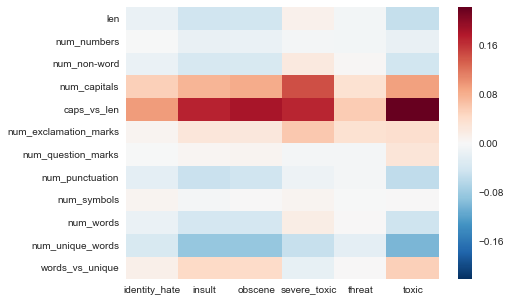

In [13]:
plt.figure(figsize=(7,5))
columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

rows = [{c:train_df[f].corr(train_df[c]) for c in columns} for f in new_features]
df_correlations = pd.DataFrame(rows, index=new_features)

sns.heatmap(df_correlations)

In [14]:
train_df[new_features] = train_df[new_features].fillna(0)
test_df[new_features] = test_df[new_features].fillna(0)

In [15]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,len,num_numbers,num_non-word,num_capitals,caps_vs_len,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,num_words,num_unique_words,words_vs_unique
0,0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0,269,9,58,17,0.063197,0,1,6,0,49,44,0.897959
1,000103f0d9cfb60f,D'aww ! He match this background colour I 'm s...,0,0,0,0,0,0,119,10,38,8,0.067227,1,0,5,0,27,23,0.851852
2,000113f07ec002fd,"Hey man , I 'm really not trying to edit war ....",0,0,0,0,0,0,239,0,53,4,0.016736,0,0,4,0,48,43,0.895833
3,0001b41b1c6bb37e,`` More I ca n't make any real suggestion on i...,0,0,0,0,0,0,630,0,152,11,0.017460,0,0,6,1,128,90,0.703125
4,0001d958c54c6e35,"You , sir , are my hero . Any chance you remem...",0,0,0,0,0,0,72,0,22,2,0.027778,0,1,3,0,18,17,0.944444


In [16]:
test_df.head()

,id,comment_text,len,num_numbers,num_non-word,num_capitals,caps_vs_len,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,num_words,num_unique_words,words_vs_unique
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you 'l...,369,0,92,4,0.010840,0,0,11,0,81,66,0.814815
1,0000247867823ef7,"== From RfC == The title is fine a it is , IMO .",48,0,19,7,0.145833,0,0,2,0,14,12,0.857143
2,00013b17ad220c46,`` == Sources == * Zawe Ashton on Lapland — / ``,48,0,22,4,0.083333,0,0,0,1,12,10,0.833333
3,00017563c3f7919a,": If you have a look back at the source , the ...",210,0,49,4,0.019048,0,0,5,0,44,32,0.727273
4,00017695ad8997eb,I do n't anonymously edit article at all .,42,0,10,1,0.023810,0,0,1,0,9,9,1.000000


### Cleaning text

In [17]:
repeated = ['aids', 'shit', 'fuck', 'damn', 'bitch', 'crap', 'piss', 'dick', 
            'darn', 'cock', 'pussy', 'ass', 'asshole', 'fag', 'bastard', 'slut', 
            'douche', 'bastard', 'darn', 'bloody', 'bugger', 'bollocks', 'arsehole', 
            'nigger', 'nigga', 'moron', 'gay', 'antisemitism', 'anti', 'nazi', 'poop',
            'spam', 'haha', 'idiot', 'twat', 'pricks', 'cunt', 'hihi', 'hehe']

In [18]:
for df in [train_df, test_df]:
    for r in repeated:
        df['comment_text'] = df['comment_text'].str.lower().apply(lambda x: re.sub(r'('+r+'.{,1})+', r, str(x)))
        df['comment_text'] = df['comment_text'].apply(lambda x: re.sub(r'(\\n)', '', str(x)))
        df['comment_text'] = df['comment_text'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))     

In [19]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,len,num_numbers,num_non-word,num_capitals,caps_vs_len,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,num_words,num_unique_words,words_vs_unique
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,269,9,58,17,0.063197,0,1,6,0,49,44,0.897959
1,000103f0d9cfb60f,daww he match this background colour i m seem...,0,0,0,0,0,0,119,10,38,8,0.067227,1,0,5,0,27,23,0.851852
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0,0,0,0,0,0,239,0,53,4,0.016736,0,0,4,0,48,43,0.895833
3,0001b41b1c6bb37e,more i ca nt make any real suggestion on impr...,0,0,0,0,0,0,630,0,152,11,0.017460,0,0,6,1,128,90,0.703125
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0,0,0,0,0,0,72,0,22,2,0.027778,0,1,3,0,18,17,0.944444


In [20]:
test_df.head()

,id,comment_text,len,num_numbers,num_non-word,num_capitals,caps_vs_len,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,num_words,num_unique_words,words_vs_unique
0,00001cee341fdb12,yo bitchja rule is more succesful then you ll ...,369,0,92,4,0.010840,0,0,11,0,81,66,0.814815
1,0000247867823ef7,from rfc the title is fine a it is imo,48,0,19,7,0.145833,0,0,2,0,14,12,0.857143
2,00013b17ad220c46,sources zawe ashton on lapland,48,0,22,4,0.083333,0,0,0,1,12,10,0.833333
3,00017563c3f7919a,if you have a look back at the source the in...,210,0,49,4,0.019048,0,0,5,0,44,32,0.727273
4,00017695ad8997eb,i do nt anonymously edit article at all,42,0,10,1,0.023810,0,0,1,0,9,9,1.000000


In [21]:
results = set()
train_df['comment_text'].str.lower().str.split().apply(results.update)
test_df['comment_text'].str.lower().str.split().apply(results.update)
print(list(results)[:10])

['gameplay', 'തനനതനനറയമ', 'confuzie', 'valencia', 'gaydevil', 'selfproclaied', 'contribs', 'fundamentalists', 'infinitivs', 'totemplate']


In [22]:
len(results)

436579

In [23]:
from tqdm import tqdm
from itertools import groupby
import stopit

@stopit.threading_timeoutable(default='aborted')
def speel_corrector(word):
    return spell(word)

aborted = []
to_replace = {}
for word in tqdm(results):   
    if len(word) >= 15:
        word = ''.join(c for c, _ in groupby(word))
        if len(word) < 15:
            new_word = speel_corrector(word, timeout=20)
            if new_word == 'aborted' and len(word) < 15:
                aborted.append(word)
                print(word)
            elif new_word != word:
                to_replace[word] = new_word

100%|█████████████████████████████████████████████████████████████████████████| 436579/436579 [21:16<00:00, 342.05it/s]


In [24]:
len(to_replace)

438

In [25]:
df = pd.DataFrame(list(to_replace.items()), columns=['ToReplace', 'Value'])

In [26]:
df.head(10)

,ToReplace,Value
0,distinctivenes,distinctiveness
1,_,a
2,lol,ll
3,sledgehamering,sledgehammering
4,sympatheticaly,sympathetically
5,opo,oo
6,dik,did
7,yie,die
8,topographicaly,topographically
9,eheho,EEHO


In [27]:
df.to_csv('to_correct.csv', index=False)

In [21]:
to_replace = pd.read_csv('to_correct.csv').to_dict()

In [22]:
train_df['comment_text'] = train_df['comment_text'].str.lower().replace(to_replace)
train_df.to_csv('toxic_train_processed.csv', index=False)

In [23]:
test_df['comment_text'] = test_df['comment_text'].str.lower().replace(to_replace)
test_df.to_csv('toxic_test_processed.csv', index=False)

In [24]:
gc.collect()

105

In [25]:
train_df = pd.read_csv('toxic_train_processed.csv')
test_df = pd.read_csv('toxic_test_processed.csv')